In [6]:

import pandas as pd
import matplotlib.pyplot as plt
import folium


# Replace 'C:\Users\kehin\Downloads\farmlands.csv' with the actual path to your CSV file
# csv_file_path = "C:\Users\Latitude E7270\Desktop\Novotern Internship\Nigeria-Farmland-App\farmlands.csv"

# Read CSV file into a DataFrame
farmland = pd.read_csv("farmlands.csv")

farmland.head()

In [2]:
farmland.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44334 entries, 0 to 44333
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   id                   44334 non-null  object
 1   state_code           43927 non-null  object
 2   source               44334 non-null  object
 3   name                 44334 non-null  object
 4   type                 39059 non-null  object
 5   power_source         33 non-null     object
 6   category             44334 non-null  object
 7   ward_code            44334 non-null  object
 8   processing_facility  2003 non-null   object
 9   global_id            44334 non-null  object
 10  geometry             44334 non-null  object
dtypes: object(11)
memory usage: 3.7+ MB


Question 1 - What is the most common source of electricity for farmers?
According to the data, we have just one source of electricty for farmers across Nigeria which is from the GRID

In [3]:
# getting the categories for the source of electricity

farmland["source"].value_counts()

GRID    44334
Name: source, dtype: int64

Question 2 - Which type of agriculture is mostly practiced by farmers in Nigeria?
From the data, it is seen that 46.6% of the farmers practiced both commercial and subsistence farming, 35.5% practiced commercial farming while only 18% practiced subsistence farming.

In [4]:
## getting the frequencies of agriculture type

counts = farmland["type"].value_counts(normalize=True) 
percentage = round(counts*100, 1)

print(percentage)

Both           46.6
Commercial     35.4
Subsistence    18.0
Name: type, dtype: float64


Question 3 - Plot the location of the farms on a map
From the map below, we can see the distribution of farmlands across Nigeria. We can see that we have a higher concentration of farmlands in the South-West, South-East and North-East.

In [11]:
map = folium.Map(location=[9.0820, 8.6753], zoom_start=20)
map

In [12]:
# Calculate the total number of farms
total_farms = farmland['id'].value_counts()
print(total_farms)

u_fc_poi_farm.1        1
u_fc_poi_farm.29559    1
u_fc_poi_farm.29551    1
u_fc_poi_farm.29552    1
u_fc_poi_farm.29553    1
                      ..
u_fc_poi_farm.14780    1
u_fc_poi_farm.14781    1
u_fc_poi_farm.14782    1
u_fc_poi_farm.14783    1
u_fc_poi_farm.44334    1
Name: id, Length: 44334, dtype: int64


In [13]:
# Display the distribution of farm types
farm_type_distribution = farmland['type'].value_counts()

# Print the result
print(farm_type_distribution)

Both           18183
Commercial     13840
Subsistence     7036
Name: type, dtype: int64


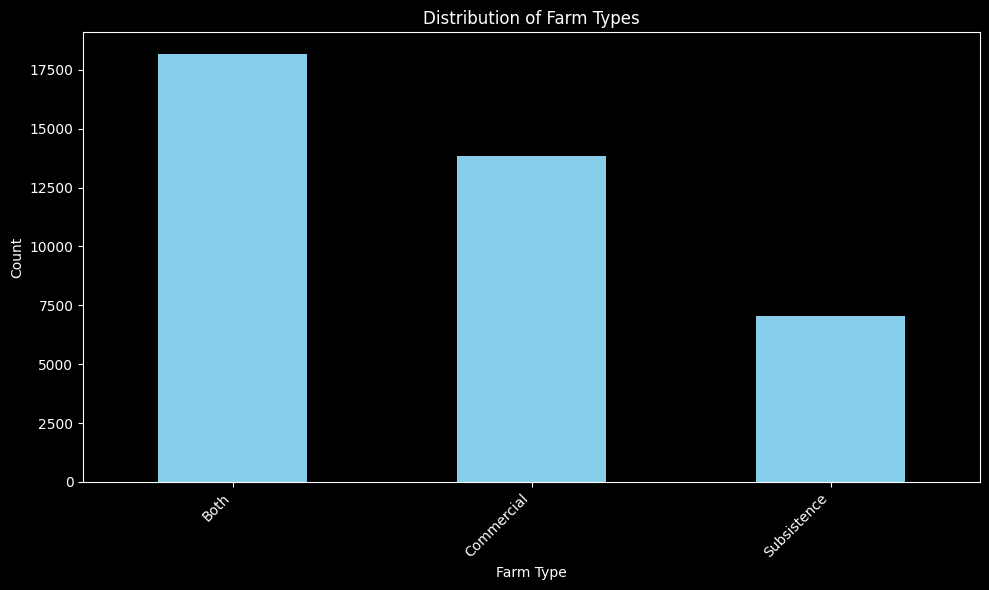

In [14]:
# Plot a bar chart
plt.figure(figsize=(10, 6))
farm_type_distribution.plot(kind='bar', color='skyblue')
plt.title('Distribution of Farm Types')
plt.xlabel('Farm Type')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()

# Show the plot
plt.show()

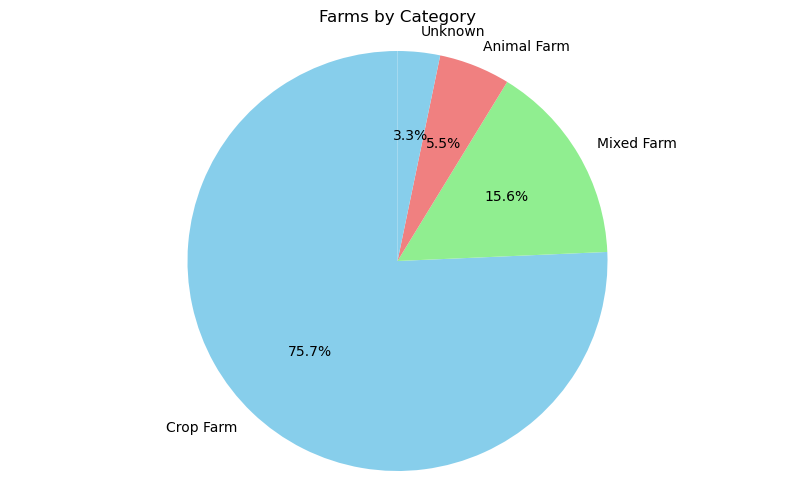

In [30]:
# Calculate the farm categories
farms_by_category = farmland['category'].value_counts()

# Plot a pie chart
plt.figure(figsize=(10, 6))
plt.pie(farms_by_category, labels=farms_by_category.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightgreen', 'lightcoral'])
plt.title('Farms by Category')
plt.axis('equal')  # Equal aspect ratio ensures that the pie chart is circular

# Display the plot
plt.show()

In [15]:
# Count the number of farms with and without a processing facility
farms_with_facility = farmland[farmland['processing_facility'] == True].shape[0]
farms_without_facility = farmland[farmland['processing_facility'] == False].shape[0]

# Total number of farms in the dataset
total_farms = farmland.shape[0]

# Calculate the percentages
percentage_with_facility = (farms_with_facility / total_farms) * 100
percentage_without_facility = (farms_without_facility / total_farms) * 100

# Display the results
print(f"Farms with a processing facility: {farms_with_facility}")
print(f"Percentage of farms with a processing facility: {percentage_with_facility:.2f}%")

print(f"Farms without a processing facility: {farms_without_facility}")
print(f"Percentage of farms without a processing facility: {percentage_without_facility:.2f}%")


Farms with a processing facility: 33
Percentage of farms with a processing facility: 0.07%
Farms without a processing facility: 1970
Percentage of farms without a processing facility: 4.44%
